# 6.2 Exploring Relationships 

## Outline
I'll explore two datasets for this part of the project, each taken from the US Census Bureau's Annual Social and Economic Supplement (ASEC) data sets 2022. The data sets contain information on household and individual income and health insurance coverage and out-of-pocket expenses. I have worked on the complete data sets previously in Excel and saved csv files of useful columns as: 

- HealthInsurance_Income.csv (household)
- Per_Med_Expenses.csv (individual (person))

As the project progresses, I anticipate much more cleaning and wrangling of this data. For this early stage of exploration, I've decided to keep them separate and draw from them as needed

## 1. Import libraries and Data

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Check matplotlib version
matplotlib.__version__

'3.5.2'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [4]:
# Turn project folder path into a string
path = r'/Users/peterreadman/Desktop/Python Projects/PortfolioProjects/HealthcareSpending/'

In [195]:
# import data

household_df = pd.read_csv(os.path.join(path,'02 Data','02a Original Data','HealthInsurance_Income.csv'))
person_df = pd.read_csv(os.path.join(path,'02 Data','02a Original Data','Per_Med_Expenses.csv'))

## Exploring Relationships

## 2. US Household Income and Health Insurance Coverage 

#### 2.i Prepare Data
Some of the 35 columns are not required for this stage of the project. Geographic codes and previous year coverage flags will be removed for now.

In [196]:
household_df.shape

(89197, 35)

Select columns relevant to analysis of Household income, Household health insurance coverage, and Household location

In [6]:
# Create a list of original columns for reference
columns_original = ['Household_ID'
                 ,'Region'
                 ,'State_Code'
                 ,'Census_Division'
                 ,'Household_Type'
                 ,'Income_Bracket_CPS'
                 ,'Num_Persons_Household'
                 ,'Health_Ins_Last_year'
                 ,'Retirement_Distr'
                 ,'Retirement_Distr_58'
                 ,'Total_Household_Earnings'
                 ,'Income_Farm'
                 ,'Income_Bracket'
                 ,'SelfEmployed_Farm'
                 ,'SelfEmployed'
                 ,'Wage_Salary'
                 ,'Medicaid_Last_Year'
                 ,'Inc_Percentiles'
                 ,'Health_Ins_Private_Last_year'
                 ,'Health_Ins_Public_Last_year'
                 ,'Income_SE'
                 ,'Income_Top5_Pct'
                 ,'Total_Household_Income'
                 ,'Income_Wages_Salary'
                 ,'Health_Ins_Now'
                 ,'Medicaid_Now'
                 ,'Health_Ins_Private_Now'
                 ,'Health_Ins_Public_Now'
                 ,'Metropolitan_Code'
                 ,'County_Code'
                 ,'Prin_City','Met_Area_Size'
                 ,'Stats_Area_FIPS'
                 ,'Metropolitan_Status'
                 ,'City_Code_Ind_Princ'
                   ]



In [197]:
# Create a list of columns relevant for initial exploration and checking

columns_set1 = ['Household_ID'
                 ,'Region'
                 ,'State_Code'
                 #,'Census_Division'
                 ,'Household_Type'
                 #,'Income_Bracket_CPS'
                 ,'Num_Persons_Household'
                 #,'Health_Ins_Last_year'
                 ,'Retirement_Distr'
                 ,'Retirement_Distr_58'
                 ,'Total_Household_Earnings'
                 ,'Income_Farm'
                 ,'Income_Bracket'
                 ,'SelfEmployed_Farm'
                 ,'SelfEmployed'
                 ,'Wage_Salary'
                 #,'Medicaid_Last_Year'
                 ,'Inc_Percentiles'
                 #,'Health_Ins_Private_Last_year'
                 #,'Health_Ins_Public_Last_year'
                 ,'Income_SE'
                 ,'Income_Top5_Pct'
                 ,'Total_Household_Income'
                 ,'Income_Wages_Salary'
                 ,'Health_Ins_Now'
                 ,'Medicaid_Now'
                 ,'Health_Ins_Private_Now'
                 ,'Health_Ins_Public_Now'
                 ,'Metropolitan_Code'
                 ,'County_Code'
                 ,'Prin_City','Met_Area_Size'
                 #,'Stats_Area_FIPS'
                 ,'Metropolitan_Status'
                 #,'City_Code_Ind_Princ'
               ]


In [8]:
# create new dataframe for 'set1' columns for initial exploration
household_df_set1 = household_df[columns_set1].copy()

In [9]:
household_df_set1.head()

,Household_ID,Region,State_Code,Household_Type,Num_Persons_Household,Retirement_Distr,Retirement_Distr_58,Total_Household_Earnings,Income_Farm,Income_Bracket,...,Income_Wages_Salary,Health_Ins_Now,Medicaid_Now,Health_Ins_Private_Now,Health_Ins_Public_Now,Metropolitan_Code,County_Code,Prin_City,Met_Area_Size,Metropolitan_Status
0,2.022090e+19,1,23,6,1,0,2,44200,0,18,...,44200,1,3,1,3,0,0,3,0,2
1,7.707320e+18,1,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,2
2,1.577120e+19,1,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,2
3,1.660730e+19,1,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,2
4,2.100060e+19,1,23,1,2,0,2,80600,2500,34,...,48000,1,3,1,3,0,0,3,0,2


In [10]:
household_df_set1.dtypes

Household_ID                float64
Region                        int64
State_Code                    int64
Household_Type                int64
Num_Persons_Household         int64
Retirement_Distr              int64
Retirement_Distr_58           int64
Total_Household_Earnings      int64
Income_Farm                   int64
Income_Bracket                int64
SelfEmployed_Farm             int64
SelfEmployed                  int64
Wage_Salary                   int64
Inc_Percentiles               int64
Income_SE                     int64
Income_Top5_Pct               int64
Total_Household_Income        int64
Income_Wages_Salary           int64
Health_Ins_Now                int64
Medicaid_Now                  int64
Health_Ins_Private_Now        int64
Health_Ins_Public_Now         int64
Metropolitan_Code             int64
County_Code                   int64
Prin_City                     int64
Met_Area_Size                 int64
Metropolitan_Status           int64
dtype: object

#### 2. ii) Missing Values Check:

In [11]:
# Check for missing values

household_df_set1.isnull().sum() # No missing values!

Household_ID                0
Region                      0
State_Code                  0
Household_Type              0
Num_Persons_Household       0
Retirement_Distr            0
Retirement_Distr_58         0
Total_Household_Earnings    0
Income_Farm                 0
Income_Bracket              0
SelfEmployed_Farm           0
SelfEmployed                0
Wage_Salary                 0
Inc_Percentiles             0
Income_SE                   0
Income_Top5_Pct             0
Total_Household_Income      0
Income_Wages_Salary         0
Health_Ins_Now              0
Medicaid_Now                0
Health_Ins_Private_Now      0
Health_Ins_Public_Now       0
Metropolitan_Code           0
County_Code                 0
Prin_City                   0
Met_Area_Size               0
Metropolitan_Status         0
dtype: int64

#### 2. iii) Duplicates Check:

In [12]:
# Find duplicates

df_dups = household_df_set1[household_df_set1.duplicated()]

In [13]:
df_dups.shape # 3173 duplicates but the Household_ID column is different. Not sure what this result means

(3173, 27)

In [198]:
df_dups.head()

,Household_ID,Region,State_Code,Household_Type,Num_Persons_Household,Retirement_Distr,Retirement_Distr_58,Total_Household_Earnings,Income_Farm,Income_Bracket,...,Income_Wages_Salary,Health_Ins_Now,Medicaid_Now,Health_Ins_Private_Now,Health_Ins_Public_Now,Metropolitan_Code,County_Code,Prin_City,Met_Area_Size,Metropolitan_Status
23,6.092050e+19,1,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,2
122,2.031020e+18,1,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,2
207,2.031060e+18,1,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,2
208,1.895620e+19,1,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,2
213,2.031010e+18,1,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,2


#### Obvservation
3173 duplicate rows were returned which is unexpected. The duplicate rows include distinct 'Household_ID' values, e.g. rows 122 and 207 have distinct 'Household_ID' values. **This has been noted for further investigation**

#### 2. iv) Mixed-Type Data:

In [15]:
for col in household_df_set1.columns.tolist():
      weird = (household_df_set1[[col]].applymap(type) != household_df_set1[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (household_df_set1[weird]) > 0:
        print (col)
        
# No mixed-type columns

## 3a) Exploring Relationships in the 'Household' data

### Correlations

First, I'll explore correlations between the following variables from the Household data:
- Region
- Household income
- Number of persons per household
- Total household earnings
- Total household income
- Income type: Farming
- Income type: Farming (self-employed)
- Income type: Self-employed
- Income type: Retirement
- Income type: Wages/Salary
- Current Health insurance coverage
- Metropolitan area size

In [16]:
# Create a subset to test relationships between selected columns

In [17]:
# Create a list of columns relevant for initial exploration and checking
columns_set2 = [#'Household_ID'
                 'Region'
                 #,'State_Code'
                 #,'Census_Division'
                 ,'Household_Type'
                 #,'Income_Bracket_CPS'
                 ,'Num_Persons_Household'
                 #,'Health_Ins_Last_year'
                 ,'Retirement_Distr'
                 #,'Retirement_Distr_58'
                 ,'Total_Household_Earnings'
                 ,'Income_Farm'
                 ,'Income_Bracket'
                 ,'SelfEmployed_Farm'
                 ,'SelfEmployed'
                 ,'Wage_Salary'
                 #,'Medicaid_Last_Year'
                 #,'Inc_Percentiles'
                 #,'Health_Ins_Private_Last_year'
                 #,'Health_Ins_Public_Last_year'
                 ,'Income_SE'
                 #,'Income_Top5_Pct'
                 ,'Total_Household_Income'
                 ,'Income_Wages_Salary'
                 ,'Health_Ins_Now'
                 #,'Medicaid_Now'
                 #,'Health_Ins_Private_Now'
                 #,'Health_Ins_Public_Now'
                 #,'Metropolitan_Code'
                 #,'County_Code'
                 #,'Prin_City'
                 ,'Met_Area_Size'
                 #,'Stats_Area_FIPS'
                 #,'Metropolitan_Status'
                 #,'City_Code_Ind_Princ'
               ]


In [18]:
# create new dataframe for 'set1' columns for initial exploration
df_rels = household_df[columns_set2].copy()

In [19]:
df_rels.corr()

,Region,Household_Type,Num_Persons_Household,Retirement_Distr,Total_Household_Earnings,Income_Farm,Income_Bracket,SelfEmployed_Farm,SelfEmployed,Wage_Salary,Income_SE,Total_Household_Income,Income_Wages_Salary,Health_Ins_Now,Met_Area_Size
Region,1.000000,0.018875,0.051393,-0.002306,0.005755,-0.004664,0.028499,0.044562,0.038786,0.034903,0.001639,0.005690,0.005930,0.065628,-0.068857
Household_Type,0.018875,1.000000,0.114077,0.014059,0.028718,-0.000965,0.230672,0.612088,0.610970,0.631784,0.004789,0.056065,0.028755,0.520987,0.031788
Num_Persons_Household,0.051393,0.114077,1.000000,0.012423,0.450929,0.031221,0.691556,0.699816,0.666404,0.474663,0.095864,0.454356,0.443251,0.611435,0.035683
Retirement_Distr,-0.002306,0.014059,0.012423,1.000000,-0.019328,-0.001017,0.093613,0.058007,0.058294,0.095791,-0.000774,0.145077,-0.019806,0.030684,0.007502
Total_Household_Earnings,0.005755,0.028718,0.450929,-0.019328,1.000000,0.081345,0.626130,0.373820,0.348602,0.135200,0.260145,0.927627,0.970910,0.279906,0.109358
Income_Farm,-0.004664,-0.000965,0.031221,-0.001017,0.081345,1.000000,0.044947,-0.012314,0.017461,0.027054,0.035926,0.075216,0.002830,0.028362,-0.027996
Income_Bracket,0.028499,0.230672,0.691556,0.093613,0.626130,0.044947,1.000000,0.741825,0.712020,0.470023,0.129381,0.680584,0.616229,0.569209,0.081489
SelfEmployed_Farm,0.044562,0.612088,0.699816,0.058007,0.373820,-0.012314,0.741825,1.000000,0.969639,0.853478,0.077167,0.430631,0.370792,0.815194,0.038410
SelfEmployed,0.038786,0.610970,0.666404,0.058294,0.348602,0.017461,0.712020,0.969639,1.000000,0.828725,-0.032553,0.405530,0.368226,0.785689,0.033427
Wage_Salary,0.034903,0.631784,0.474663,0.095791,0.135200,0.027054,0.470023,0.853478,0.828725,1.000000,0.080778,0.241215,0.119372,0.682096,0.001131


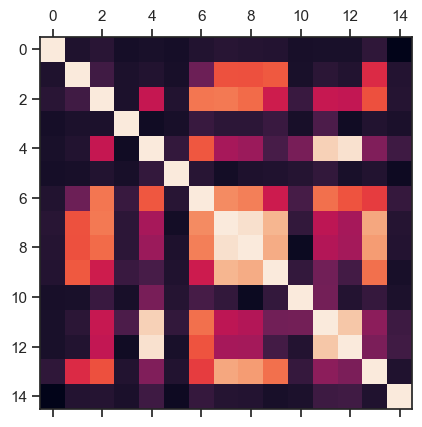

In [205]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_rels.corr())
plt.show()

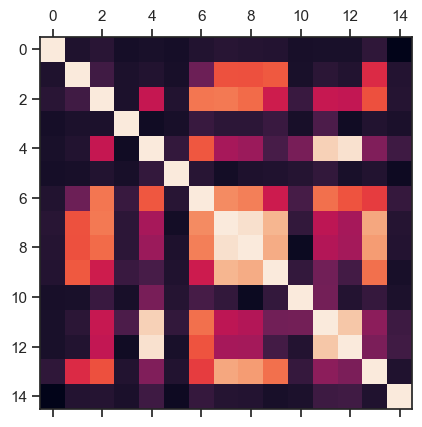

In [207]:
# Save figure
plt.matshow(df_rels.corr())
plt.savefig("out.png") 

# This will save the image in the working directory. 
#If you don't know what this directory is the next line will show you how to check

Text(0.5, 1.0, 'Correlation Matrix')

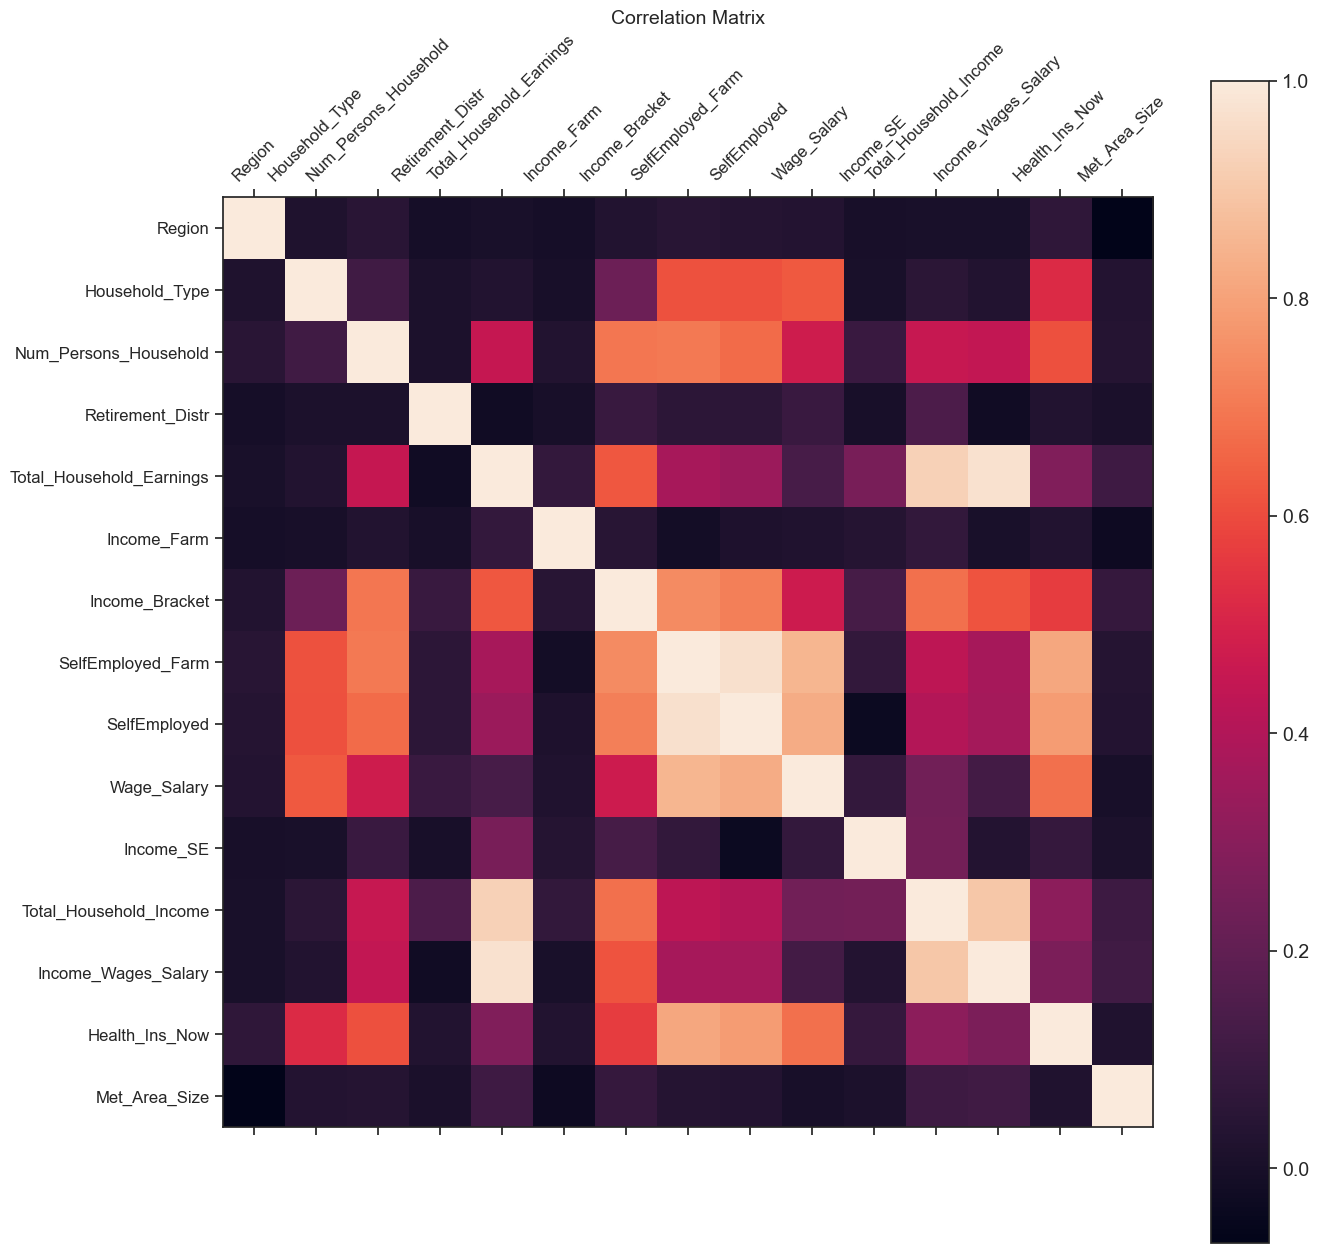

In [212]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(15, 15)) # figure size 
plt.matshow(df_rels.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_rels.shape[1]), df_rels.columns, fontsize=12, rotation=45) # x axis labels
plt.yticks(range(df_rels.shape[1]), df_rels.columns, fontsize=12) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

#### Create a correlation heatmap using seaborn:

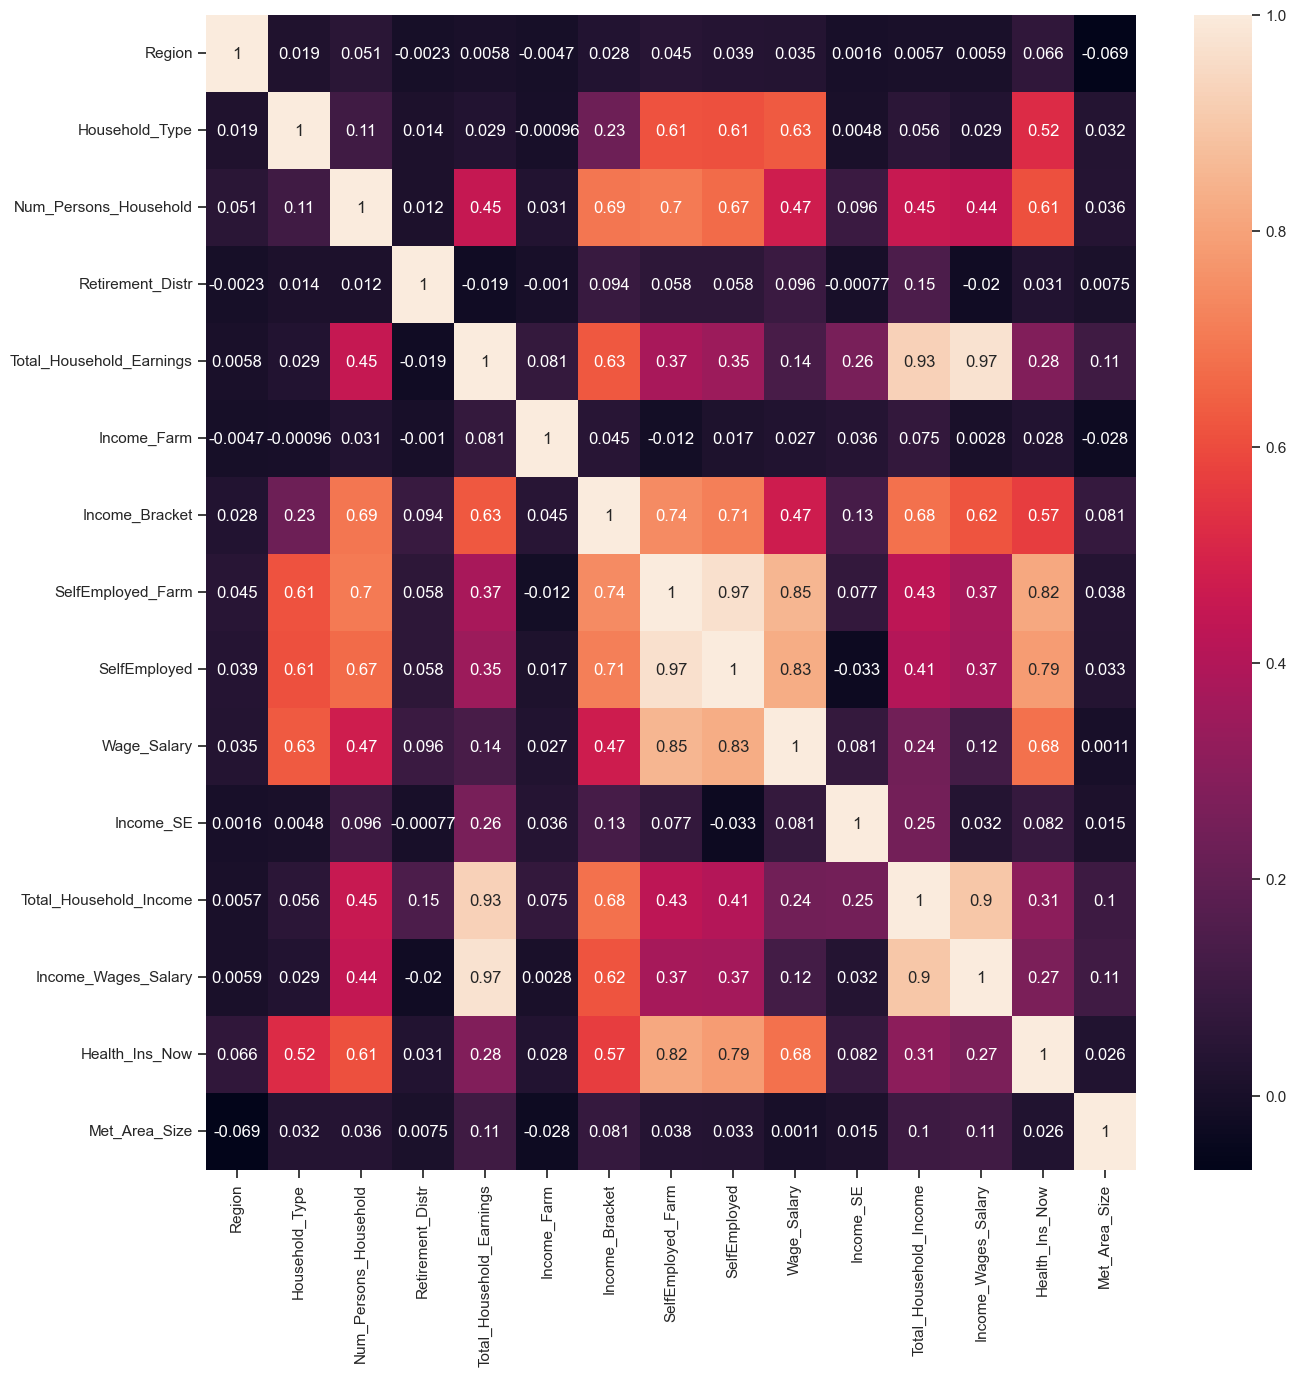

In [214]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(15,15))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_rels.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### Summary of correlation matrix for Household variables

This data includes discrete as well as continuous variables, e.g. 'Num_Persons_Household' can be any number from 1–16. Discrete varibales are unsuitable for correlation coefficients. Other methods will need to be employed to explore the relationships between Income and insurnace coverage, coverage types, household size, income type and so on. <br>
<br>
The strongest relationships are between variables which are similar to each other and don't garner much interest. That there is a strong relationship between Total Household Income and Total Household Earnings is not very insightful!

## 3b) Explore relationships in the 'Person' (Individual) data set

There are more continuous variables available in the 'Person' data set, which includes actual dollar expenditure per person on medical expenses, including the following:
- Total Out-of-pocket medical expenses
- Premium (medicare)
- Premium (insurance)
- Over-the-counter expenses
- Other 'out-of-pocket' expenses (not premiums, not over-the-counter)
- Net Earnings (total)
- Income: self-employed
- Income: wages/salary
- Income: farming
- Income: retirement distribution


In [217]:
person_df.columns

Index(['Person_ID', 'Total_OutOfPocket_Med_Exp', 'Total_OutOfPocket_Med_Exp_2',
       'Medicare_Premium', 'Ins_Premium', 'Ins_Premium_2',
       'Non_Premium_OutOfPocket', 'OverTheCounter_Exp', 'Retirement_Ann',
       'Retirement_Dist', 'Earnings_Net', 'SE_FARM_2nd', 'SE_FARM_Tot',
       'SE_Tot', 'SE_2nd', 'Wages_Tot', 'Wages_Other'],
      dtype='object')

In [218]:
person_df.head()

,Person_ID,Total_OutOfPocket_Med_Exp,Total_OutOfPocket_Med_Exp_2,Medicare_Premium,Ins_Premium,Ins_Premium_2,Non_Premium_OutOfPocket,OverTheCounter_Exp,Retirement_Ann,Retirement_Dist,Earnings_Net,SE_FARM_2nd,SE_FARM_Tot,SE_Tot,SE_2nd,Wages_Tot,Wages_Other
0,2.022090e+21,3840,3840,0,3840,3840,0,0,0,0,44200,0,0,0,0,44200,0
1,2.100060e+21,568,568,0,200,200,320,48,0,0,30000,2500,2500,30100,100,0,0
2,2.100060e+21,1300,1300,0,1200,1200,0,100,0,0,48000,0,0,0,0,48000,0
3,1.410320e+21,100,100,0,0,0,0,100,0,0,40000,0,0,0,0,40000,0
4,1.410320e+21,1400,1400,0,1000,1000,300,100,0,0,20000,0,0,0,0,20000,0


## Correlations
### Explore relationships between individual's income and their out-of-pocket medical expenses

For this exploration, only rows with income (Earnings_Net) greater than 0 are required. 0 has been entered into the original data if the respondent gave no information. It is unlikely to mean a person's income was 0.

In [219]:
# Create new dataframe with 'Earnings_Net' values greater than 0

per_inc = person_df[person_df['Earnings_Net'] != 0].copy()

In [220]:
per_inc.shape

(75640, 17)

In [221]:
per_inc.columns

Index(['Person_ID', 'Total_OutOfPocket_Med_Exp', 'Total_OutOfPocket_Med_Exp_2',
       'Medicare_Premium', 'Ins_Premium', 'Ins_Premium_2',
       'Non_Premium_OutOfPocket', 'OverTheCounter_Exp', 'Retirement_Ann',
       'Retirement_Dist', 'Earnings_Net', 'SE_FARM_2nd', 'SE_FARM_Tot',
       'SE_Tot', 'SE_2nd', 'Wages_Tot', 'Wages_Other'],
      dtype='object')

In [223]:
# create new set of only continuous data columns for correlation exploration

continuous_col = [#'Person_ID'
                  'Total_OutOfPocket_Med_Exp'
                  #,'Total_OutOfPocket_Med_Exp_2'
                  ,'Medicare_Premium'
                  ,'Ins_Premium'
                  #,'Ins_Premium_2'
                  ,'Non_Premium_OutOfPocket'
                  ,'OverTheCounter_Exp'
                  ,'Retirement_Ann'
                  ,'Retirement_Dist'
                  ,'Earnings_Net'
                  #,'SE_FARM_2nd'
                  ,'SE_FARM_Tot'
                  ,'SE_Tot'
                  #,'SE_2nd'
                  ,'Wages_Tot'
                  #,'Wages_Other'
    
                ]

In [224]:
per_med_corr = per_inc[continuous_col].copy()

In [225]:
per_med_corr.shape

(75640, 11)

In [226]:
per_med_corr.corr()

,Total_OutOfPocket_Med_Exp,Medicare_Premium,Ins_Premium,Non_Premium_OutOfPocket,OverTheCounter_Exp,Retirement_Ann,Retirement_Dist,Earnings_Net,SE_FARM_Tot,SE_Tot,Wages_Tot
Total_OutOfPocket_Med_Exp,1.000000,0.027994,0.809086,0.697693,0.260122,0.011187,0.018654,0.184370,0.019604,0.022935,0.181458
Medicare_Premium,0.027994,1.000000,0.001886,0.035818,0.066638,0.035841,0.154883,0.023143,0.019542,0.056722,0.008939
Ins_Premium,0.809086,0.001886,1.000000,0.153121,0.093419,0.008290,0.012407,0.193254,0.018225,0.019330,0.190037
Non_Premium_OutOfPocket,0.697693,0.035818,0.153121,1.000000,0.176818,0.007183,0.014497,0.070319,0.009885,0.013974,0.069502
OverTheCounter_Exp,0.260122,0.066638,0.093419,0.176818,1.000000,0.012635,0.016393,0.069008,0.010359,0.012559,0.067362
Retirement_Ann,0.011187,0.035841,0.008290,0.007183,0.012635,1.000000,0.009703,0.008388,0.001154,-0.000148,0.008133
Retirement_Dist,0.018654,0.154883,0.012407,0.014497,0.016393,0.009703,1.000000,0.000759,0.000752,0.006634,-0.001882
Earnings_Net,0.184370,0.023143,0.193254,0.070319,0.069008,0.008388,0.000759,1.000000,0.034161,0.176190,0.950955
SE_FARM_Tot,0.019604,0.019542,0.018225,0.009885,0.010359,0.001154,0.000752,0.034161,1.000000,0.029711,-0.017442
SE_Tot,0.022935,0.056722,0.019330,0.013974,0.012559,-0.000148,0.006634,0.176190,0.029711,1.000000,-0.046778


## Correlation Matrix for income vs medical expenses

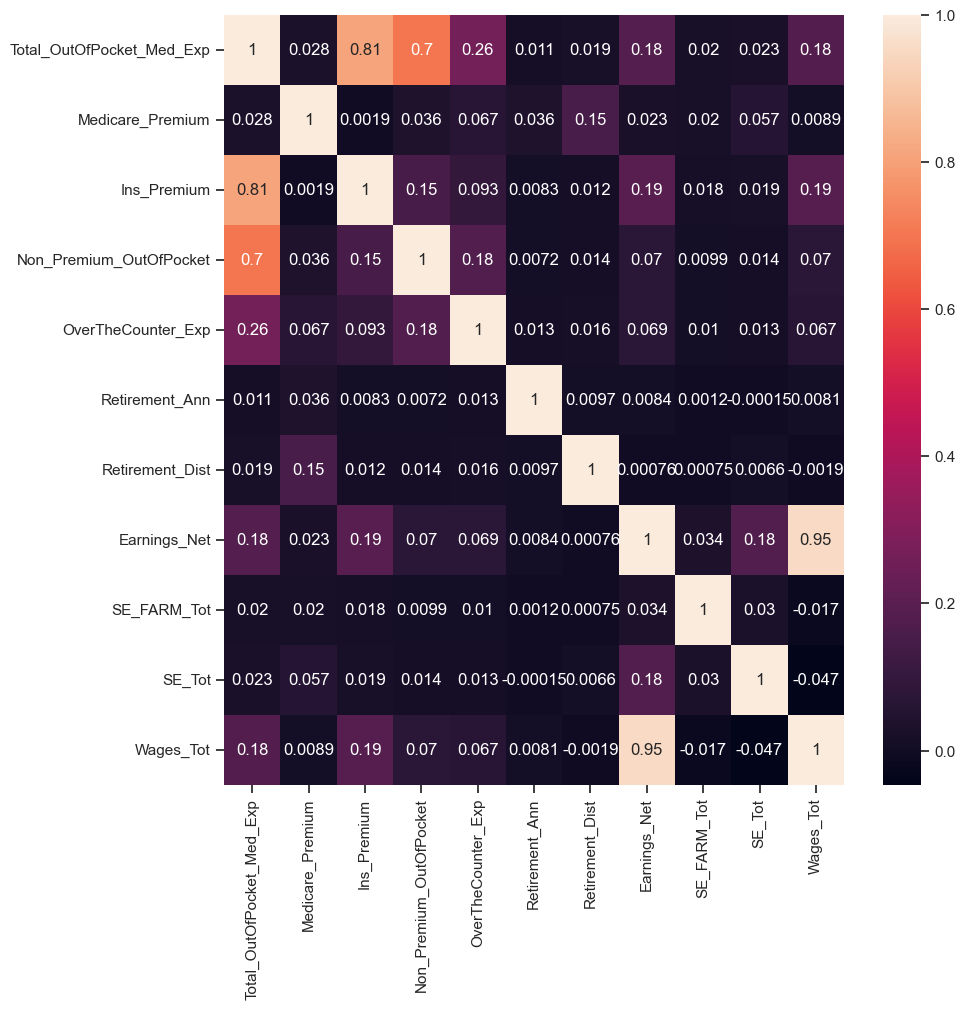

In [227]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(per_med_corr.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### Summary of correlation matrix for individual (person) data set
The strongest relationships are, again, between variables of a similar topic, but they do offer some early insights into the data.
- A correlation of 0.7 between 'Total Out-of-pocket Medical Expenses' and 'Non-Premium Out-of-Pocket' indicates that non-premium out-of-pocket expenses have a strong impact on overall medical expenses per person. This suggests a majority of individuals medical expenses not insurance premiums or over-the-counter costs.
- By comparison, 'Over The Counter' expenses actually have a weak relationship with 'Total Out-of-pocket Expenses' suggesting that prescription and other over-the-counter expenses have little influence on overall medical expenses per person

## Scatterplots for Individual (person) medical expense types and income

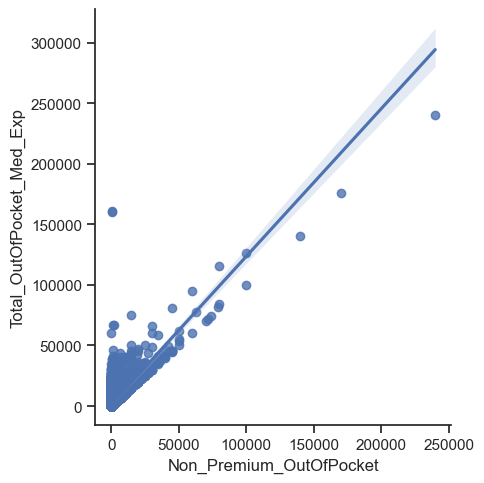

In [228]:
# Scatterplot for "Non_Premium_OutOfPocket" vs "Total_OutOfPocket_Med_Exp" variables

sns.lmplot(x = 'Non_Premium_OutOfPocket', y = 'Total_OutOfPocket_Med_Exp', data = per_med_corr)

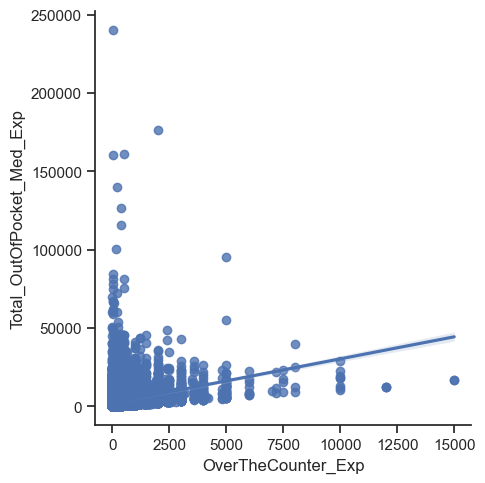

In [230]:
# Scatterplot for "OverTheCounter_Exp" vs "Total_OutOfPocket_Med_Exp" variables

sns.lmplot(x = 'OverTheCounter_Exp', y = 'Total_OutOfPocket_Med_Exp', data = per_med_corr)

### Observation
- There are some particularly high cost outliers revealed by these scatterplots, with several 'Total Out-of-pocket Expenses' over \$100,000 for some individuals in 2022. 
- One individual had non-premium out-of-pocket medical expenses just shy of $250,000
<br>
<br>
The presense of these outliers is noted for now. It would be unwise to remove them as they offer striking examples of the actual costs to individuals for medical procedures in the US. An idea for furtehr analysis is to look into whether these extremely high costs were for individuals with high incomes or not.

### The highest out-of-pocket costs fell on individuals with lower income

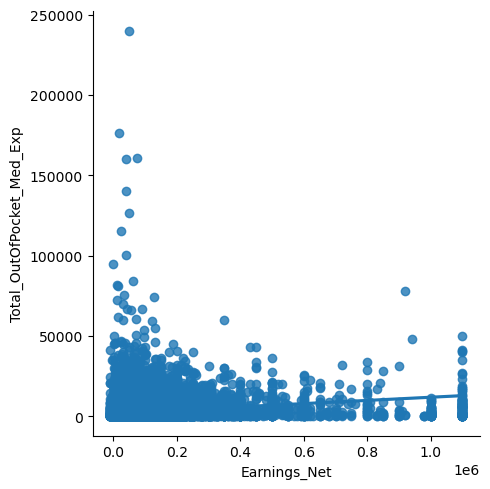

In [52]:
# Create a scatterplot for the "Earnings_Net" and "Total_OutOfPocket_Med_Exp" columns in seaborn

sns.lmplot(x = 'Earnings_Net', y = 'Total_OutOfPocket_Med_Exp', data = per_med_corr)

The scatterplot above shows the highest out-of-pocket expenses paid for by individuals with low income, at least according to the data set. 
<br>
<br>
**CAUTION**: it may be that income data is incomplete for these individuals and not representative of their actual ability to pay such large expenses. 

### Total Out-of-pocket expenses vs Insurance Premium (out-of-pocket)

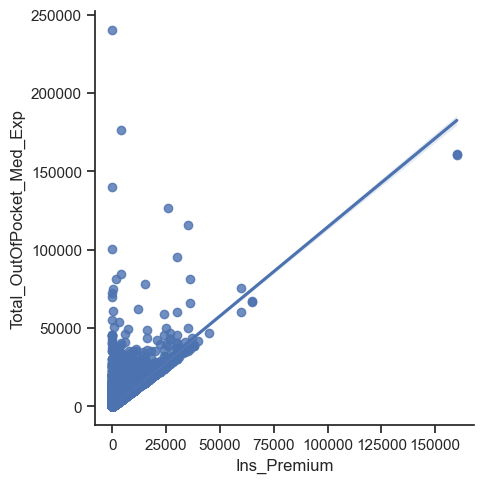

In [194]:
# Create a scatterplot for the "Ins_Premium" and "Total_OutOfPocket_Med_Exp" columns in seaborn

sns.lmplot(x = 'Ins_Premium', y = 'Total_OutOfPocket_Med_Exp', data = per_med_corr)

One more scatterplot here showing a strong relationship between Insurance Premiums (paid by individual out-of-pocket) and Total Medical Expenses. This suggests that personal insurance premiums, out-of-pocket contributions to their employer-paid coverage has a strong influence on total out-of-pocket expenses.<br>
<br>
**Note the outlier**<br>
There is one insurance premium amount for an individual at just over \$150,000 for the year. This seems excessively high and may be incorrect.

## Pair Plots for Individual Income and Out-of-pocket Medical Expenses

In [54]:
# create new set of only Earnings_Net income column against med expenses
col_pair = [#'Person_ID'
                  'Total_OutOfPocket_Med_Exp'
                  #,'Total_OutOfPocket_Med_Exp_2'
                  ,'Medicare_Premium'
                  ,'Ins_Premium'
                  #,'Ins_Premium_2'
                  ,'Non_Premium_OutOfPocket'
                  ,'OverTheCounter_Exp'
                 # ,'Retirement_Ann'
                 # ,'Retirement_Dist'
                  ,'Earnings_Net'
                  #,'SE_FARM_2nd'
                 # ,'SE_FARM_Tot'
                  #,'SE_Tot'
                  #,'SE_2nd'
                  #,'Wages_Tot'
                  #,'Wages_Other'
    
                ]

In [58]:
per_med_pair = per_inc[col_pair].copy()

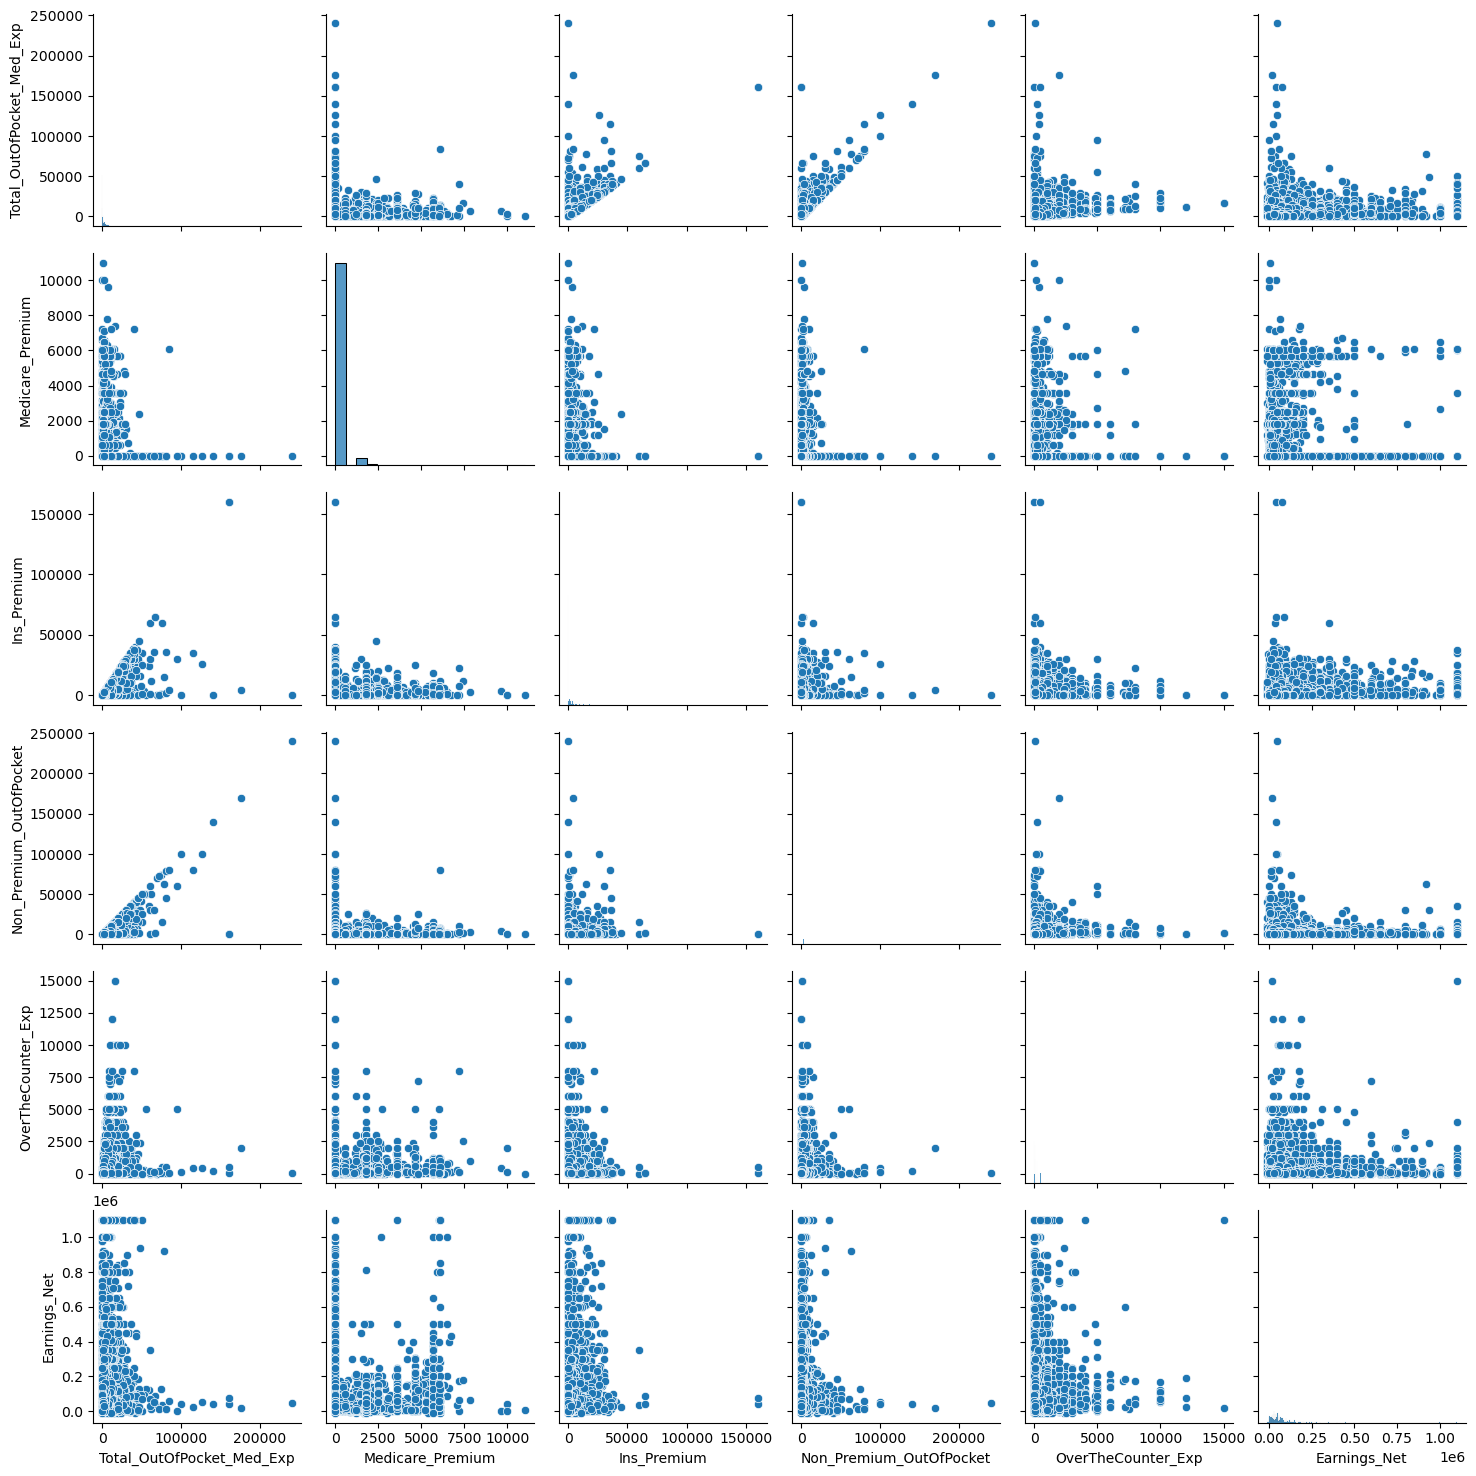

In [59]:
g = sns.pairplot(per_med_pair)

### Categorical Plots

In [72]:
# New df ignoring 0 values for 'Total_OutOfPocket_Med_Exp'

per_medExp = person_df[person_df['Total_OutOfPocket_Med_Exp'] != 0].copy()

In [74]:
per_medExp.shape

(127024, 17)

<AxesSubplot:xlabel='Total_OutOfPocket_Med_Exp', ylabel='Count'>

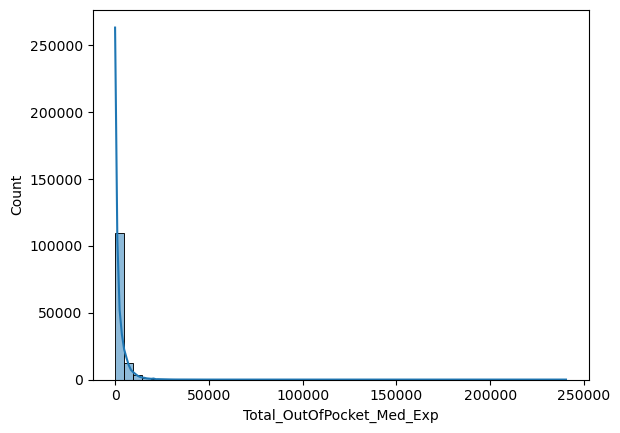

In [81]:
# Histogram to see distribution of 'Earnings_Net'

sns.histplot(per_medExp['Total_OutOfPocket_Med_Exp'], bins = 50, kde = True)

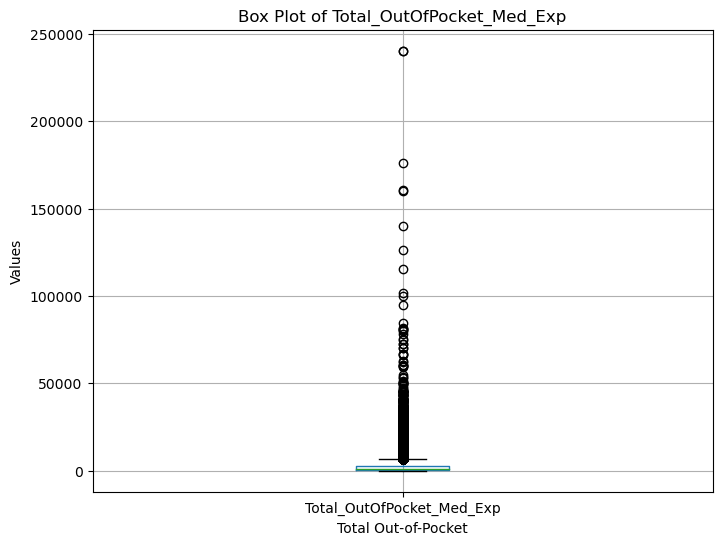

In [83]:
# Create a box plot for the column
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
per_medExp.boxplot(column='Total_OutOfPocket_Med_Exp')

# Set labels and title
plt.xlabel('Total Out-of-Pocket')
plt.ylabel('Values')
plt.title('Box Plot of Total_OutOfPocket_Med_Exp')

# Show the plot
plt.show()

### Sample the Data and Create a Categorical Plot

In [158]:
# Create a new DataFrame excluding 0 values in Total_OutOfPocket_Med_Exp and Earnings_Net

per_Inc_medExp = person_df[(person_df['Earnings_Net'] != 0) & (person_df['Total_OutOfPocket_Med_Exp'] != 0)].copy()


In [159]:
per_Inc_medExp.shape

(68324, 17)

In [179]:
# set the seed
np.random.rand(4)

# Create a list holding True/False values to the test np.random.rand() <= 0.95 (95%)
dev = np.random.rand(len(per_Inc_medExp)) <= 0.95

In [180]:
# Store 95% of the sample in the dataframe 'big'

big = per_Inc_medExp[dev]

# Store 5% of the sample in the dataframe 'small'

small = per_Inc_medExp[~dev]

In [181]:
len(per_Inc_medExp)

68324

In [182]:
len(big) + len(small)

68324

In [183]:
per_Inc_medExp_sm = small[['Earnings_Net', 'Total_OutOfPocket_Med_Exp']]

In [184]:
per_Inc_medExp_sm.head()

,Earnings_Net,Total_OutOfPocket_Med_Exp
24,72000,76
56,60608,1546
132,48000,20
158,62000,10272
183,54000,136


In [186]:
# Create categories for Out-Of-Pocket medical expenses
per_Inc_medExp_sm.loc[per_Inc_medExp_sm['Total_OutOfPocket_Med_Exp'] < 1000, 'Expenses Bracket'] = 'Low expenditure'

In [187]:
per_Inc_medExp_sm.loc[(per_Inc_medExp_sm['Total_OutOfPocket_Med_Exp'] >= 1000) & (per_Inc_medExp_sm['Total_OutOfPocket_Med_Exp'] < 12000), 'Expenses Bracket'] = 'Middle expenditure'

In [188]:
per_Inc_medExp_sm.loc[per_Inc_medExp_sm['Total_OutOfPocket_Med_Exp'] > 12000, 'Expenses Bracket'] = 'High expenditure'

In [189]:
per_Inc_medExp_sm['Expenses Bracket'].value_counts(dropna = False)

Middle expenditure    1784
Low expenditure       1399
High expenditure       122
NaN                      3
Name: Expenses Bracket, dtype: int64

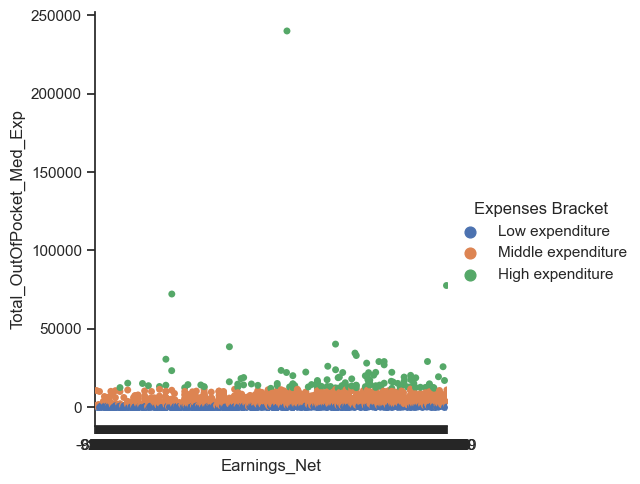

In [190]:
# Create a categorical plot in seaborn using the Expenses Brackets created above

sns.set(style="ticks")
g = sns.catplot(x="Earnings_Net", y="Total_OutOfPocket_Med_Exp", hue="Expenses Bracket", data=per_Inc_medExp_sm)

## 4. Review of initial questions for analysis
The above exploration of relationships has not provided answers to the initial questions for analysis. This is primarily due to those questions relating to discreet and categorical data such as household type, coverage type, household size and so on. <br>
<br>
I will investigate other methods to explore and test relationships posed by those questions<br>
<br>
However, the exploration above does pose some new questions as well as providing new starting points for further investigation:
- There is a wide range of out-of-pocket medical expenditure between indivudals across the US
- the highest annual out-of-pocket costs are astronomical, with a few individuals paying in excess of \$100,000 and even nearly \$250,000 in one case
- These outliers need careful consideration. In a project investigating the cost-burden of out-of-pocket medical expenses, extreme costs should not be disregarded or 'ironed out'. Instead, they may reveal people in real trouble

## 5. Hypotheses
The following are some initial suggestions for hypotheses to explore based on the exploration above:
<br>
<br>
1. Out-of-pocket costs (excluding premium and over-the-counter costs) make up the bulk of most individuals' and households' total out-of-pocket medical expenses<br>
<br>
2. High Income does not shield individuals from high out-of-pocket costs<br>
<br>
3. Over-the-counter costs (e.g. prescriptions) are not impacted by individuals' or households' income, ie those on lower incomes spend a greater proportion of their income on over-the-counter costs than higher-income individuals and hosueholds<br>

#### Although not directly informed by the exploration above, the following are some further hypotheses suggestions from the data:

4. Most people with coverage get it from their employer
5. Self-employed people have less-comprehensive insurance coverage than employed people
6. Self-employed people pay more out-of-pocket medical expenses than other types of employment/income